The data file is available with a matrix X of 100 three-dimensional data points. A script is available with code to assist you with visualizing and fitting this data. Use the results of the SVD to find a, a basis for the best (minimum sum of squared distances) one-dimensional subspace for the data.

a) Run the code to display the data in Figure the first figure. Use the rotate tool to inspect the scatter plot from different angles. Does the data appear to lie very close to a one-dimensional subspace? Does the data appear to be zero mean?

b) Figure 2 depicts the centered data and the one-dimensional subspace that contains the dominant feature you identified using the SVD. Use the rotate tool to inspect the data and one-dimensional subspace from different angles. Is a one-dimensional subspace a reasonable fit to the data? Comment on the error.

c) Now comment out (insert %) the line of code that subtracts the mean of the data. Does the dominant feature identified by SVD continue to be a good fit to the data? Comment on the importance of removing the mean before performing PCA.

In [1]:
# Enable interactive rotation of graph
%matplotlib notebook

import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

# Load data for activity
X = loadmat('PCA_Activity.mat')['X']
rows, cols = np.array(X.shape)
x, y, z = X

print('Rows of X = ',rows)
print('Cols of X = ',cols)

Rows of X =  3
Cols of X =  100


<IPython.core.display.Javascript object>


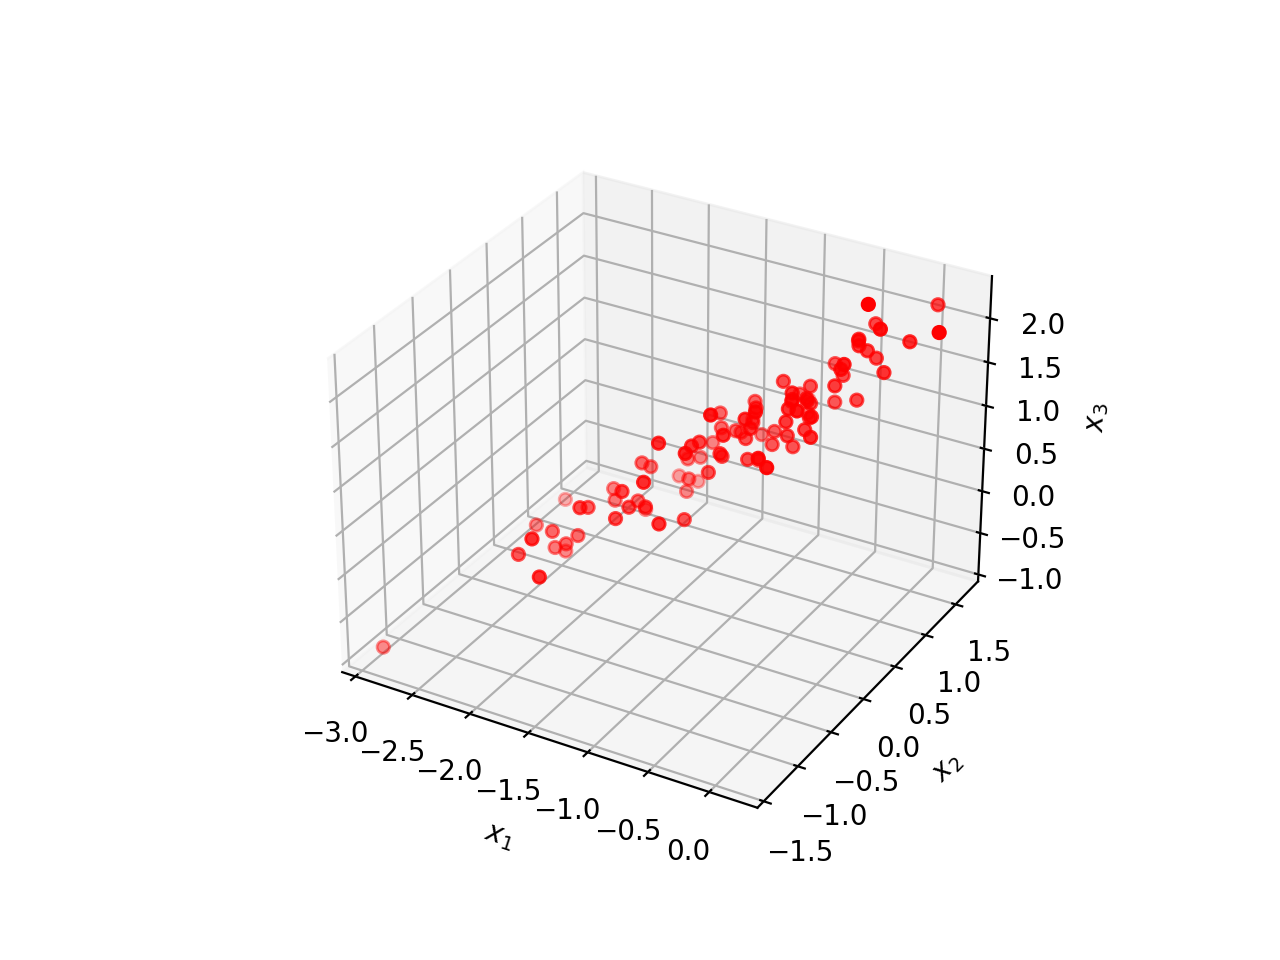

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')

plt.show()
# The data appears to be like a line

# Solution: the data appears to be concetrated along a line in three dimensions, which
# impliest most of its variability will be captured by one-dimenisonal subspace

In [38]:
# Subtract mean
X_m = X - np.mean(X, 1).reshape((3,1))
x_m, y_m, z_m = X_m
x_m2, y_m2, z_m2 = X

<IPython.core.display.Javascript object>


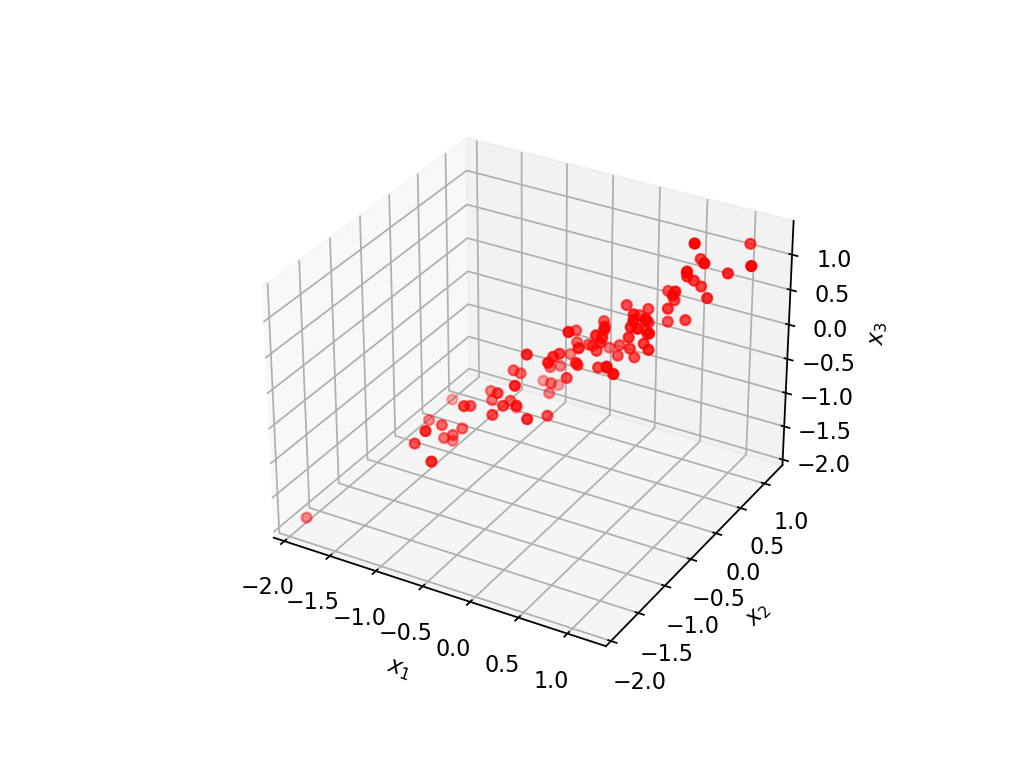

In [39]:
# display zero mean scatter plot

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_m, y_m, z_m, c='r', marker='o')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')

plt.show()

In [40]:
# Use SVD to find first principal component

U,s,VT = np.linalg.svd(X_m,full_matrices=False)

# complete the next line of code to assign the first principal component to a
a =  (s[0]/(len(X)*(1/2))*U[:,0:1])

print(a)

[[-3.76708201]
 [-3.72984204]
 [-3.69887118]]


<IPython.core.display.Javascript object>


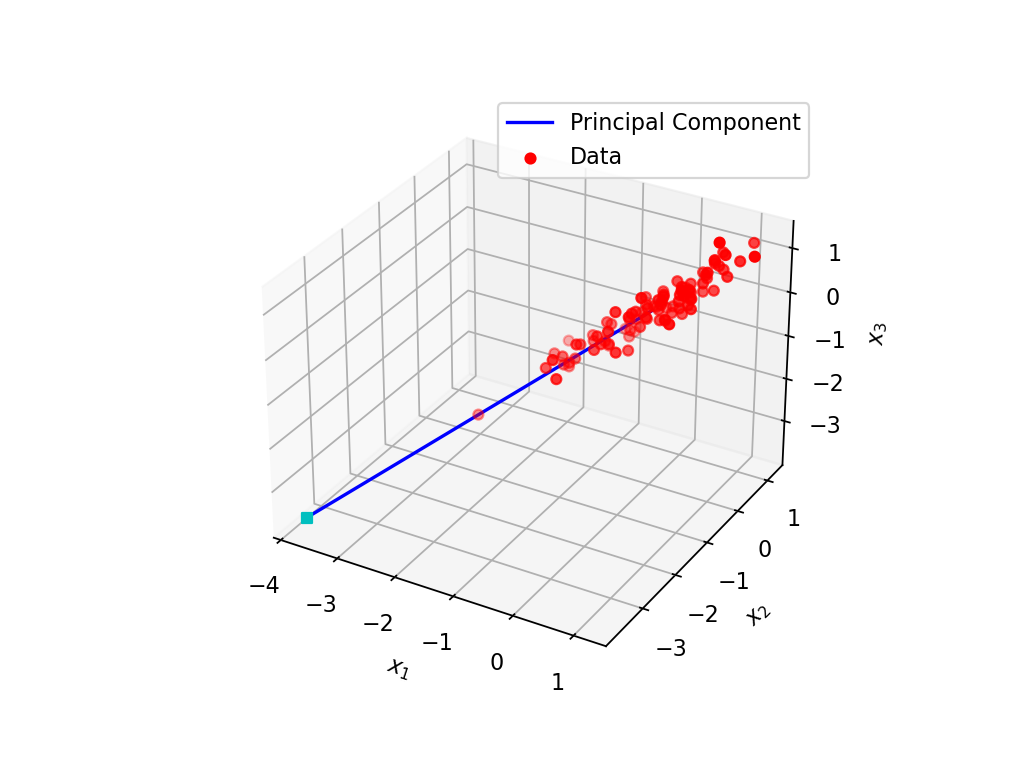

In [41]:
# display zero mean scatter plot and first principal component

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_m, y_m, z_m, c='r', marker='o', label='Data')

ax.scatter(a[0],a[1],a[2], c='c', marker='s')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')

ax.plot([0,a[0]],[0,a[1]],[0,a[2]], c='b',label='Principal Component')

ax.legend()
plt.show()
# Here we see the first principal component identifies the subspace contining the 
# mayority of the variability

<IPython.core.display.Javascript object>


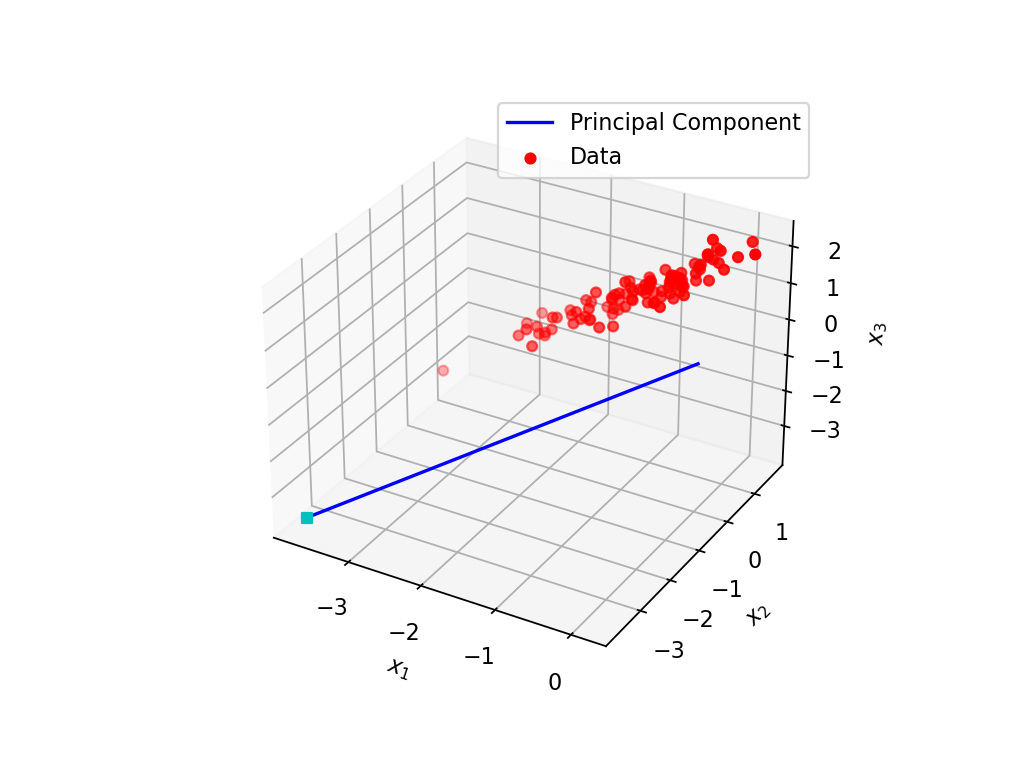

In [42]:
# if we don't remove the mean before performing then we will have a wrong result. 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_m2, y_m2, z_m2, c='r', marker='o', label='Data')

ax.scatter(a[0],a[1],a[2], c='c', marker='s')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')

ax.plot([0,a[0]],[0,a[1]],[0,a[2]], c='b',label='Principal Component')

ax.legend()
plt.show()

# c) Solution:
# If we don't remove the mean, then the direction of the first principle component 
# points towards the mean of the data and no longer captures the dominant source 
# of variability in the data